#Anmol Preet Singh -  CNN Model on MNIST Dataset for Written Digit Classification Project
Importig all the necessary libraries

In [29]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

Loading the Data set and prinitng the shape

In [30]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Re-Shaping the Data set as it goes as an Numpy array beacuse the images are in gray Scale fromat and  the array will contain the pixel representaiton of the images .

In [32]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [33]:
X_train[0].shape

(28, 28, 1)

The image is in the fromat of 28 by 28 pixels , now checking some images present in the data set.

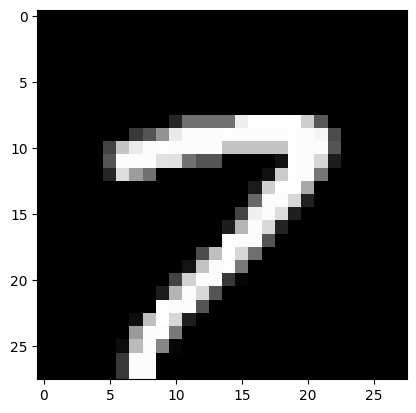

In [35]:
plt.imshow(X_train[123],cmap="gray")

Checking the Value associated with the Image.

In [36]:
y_train[123]

7

From this we can infer that the image in the data set array at 123rd index has an associated value of 7 (in the array of y_train dataset at 123rd index ) . Which can also be visually seen as it looks like the numerical value 7 .

#Converting into Float Data type

In [37]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

Normalizing the data set

In [38]:
X_train/=255.0
X_test/=255.0

Converting into Categorical Variable

In [39]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

Shape of the Model

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


#Developing the Model (CNN)

Using convolution Operation (to filter out features from images ) and Max-pooling operation (to reduce the spatial size of image)

In [41]:
cnn=Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

#Fitting the Model

In [42]:
history_cnn=cnn.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_train, y_train))

Epoch 1/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1623 - accuracy: 0.9496 - val_loss: 0.0509 - val_accuracy: 0.9846
Epoch 2/20
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0348 - val_accuracy: 0.9890
Epoch 3/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0281 - val_accuracy: 0.9913
Epoch 4/20
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0164 - val_accuracy: 0.9948
Epoch 5/20
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0129 - val_accuracy: 0.9961
Epoch 6/20
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0149 - val_accuracy: 0.9954
Epoch 7/20
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0104 -

#Plotting the Accuracy and the Validation Accuracy of the Model

Accuracy of Model

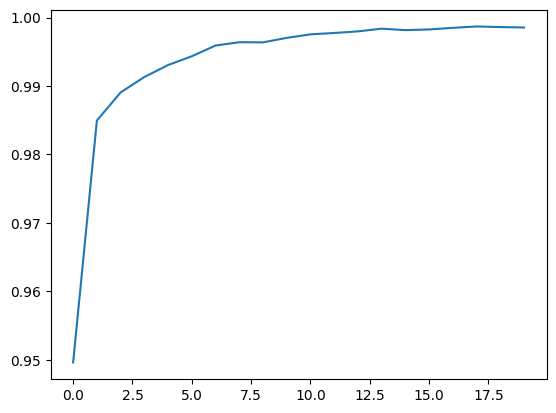

In [43]:
plt.plot(history_cnn.history['accuracy'])

Validation Accuracy of the Model

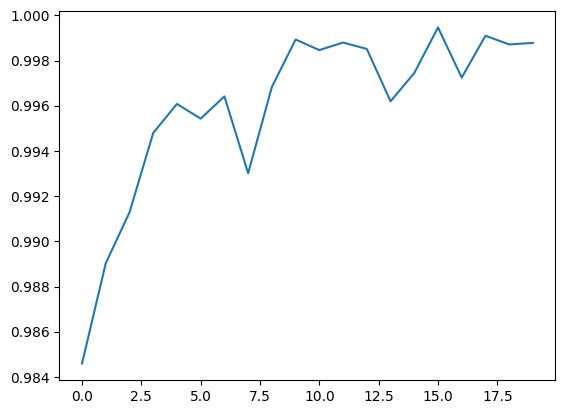

In [44]:
plt.plot(history_cnn.history['val_accuracy'])